In [8]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

def showimage(myimage):
    if (myimage.ndim>2):  #This only applies to RGB or RGBA images (e.g. not to Black and White images)
        myimage = myimage[:,:,::-1] #OpenCV follows BGR order, while matplotlib likely follows RGB order
         
    fig, ax = plt.subplots(figsize=[10,10])
    ax.imshow(myimage, cmap = 'gray', interpolation = 'bicubic')
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()

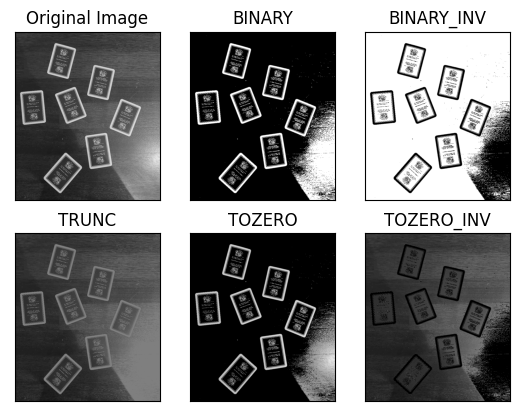

In [10]:


# how to do thresholding on a greyscale image

img = r"C:\Users\carlo\Dropbox\big projects dropbox\wecloud\obj count\cards\25.jpg"
img = cv.imread(img, cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

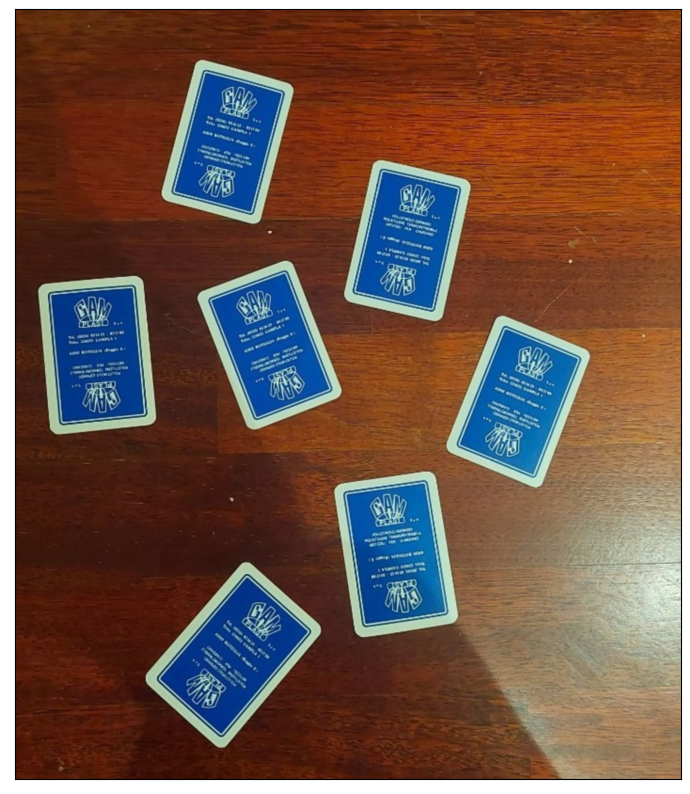

In [12]:
# how to do thresholding on a color image

img = r"C:\Users\carlo\Dropbox\big projects dropbox\wecloud\obj count\cards\25.jpg"
imgr =img = cv.imread(img)
showimage(imgr)

# mask: pixels of interest --> white; rest --> black


In [13]:
img_hsv = cv.cvtColor(imgr, cv.COLOR_BGR2HSV)

In [14]:
# range of interest - hue is the color
lower_blue = np.array([100,40,0])
upper_blue = np.array([200,255,255])

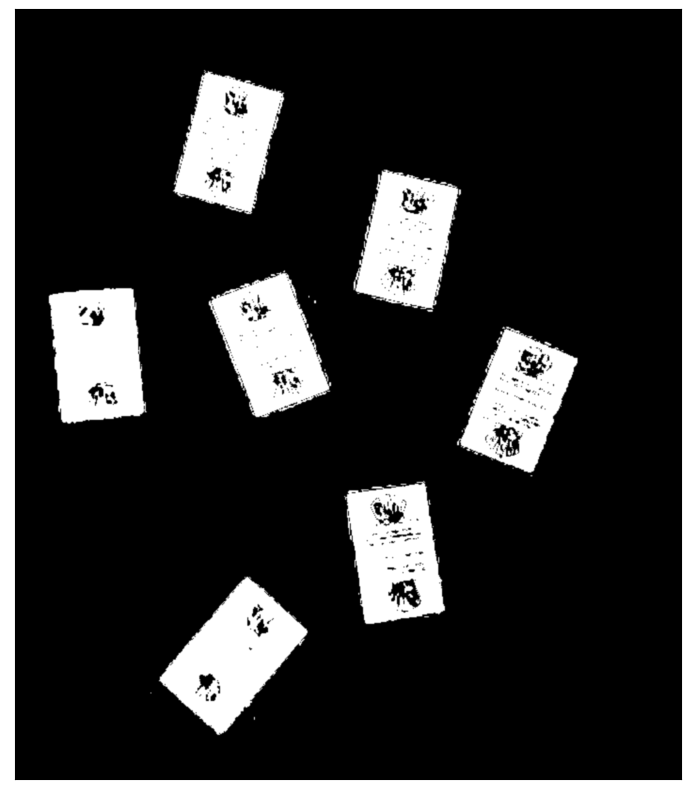

In [15]:
# we detect the blue

mask = cv.inRange(img_hsv, lower_blue, upper_blue)
showimage(mask)

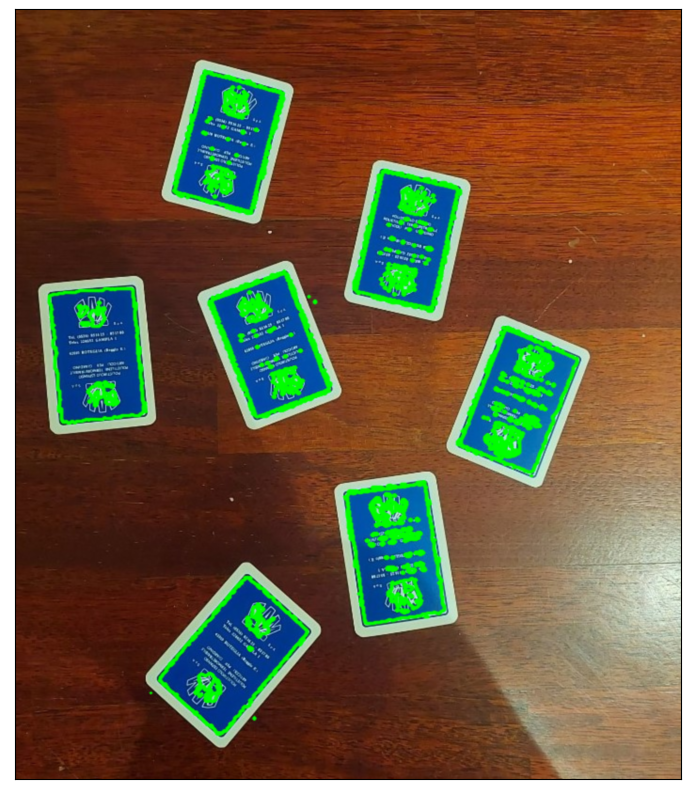

In [16]:
# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
contours, hierarchy = cv.findContours(image=mask, mode=cv.RETR_TREE, method=cv.CHAIN_APPROX_NONE)
                                      
# draw contours on the original image
image_copy = imgr.copy()
cv.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv.LINE_AA)

showimage(image_copy)
                


In [17]:
len(contours)

694

In [18]:
import pandas as pd

In [19]:
df = pd.DataFrame([cv.contourArea(c) for c in contours if cv.contourArea(c) > 5000])

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

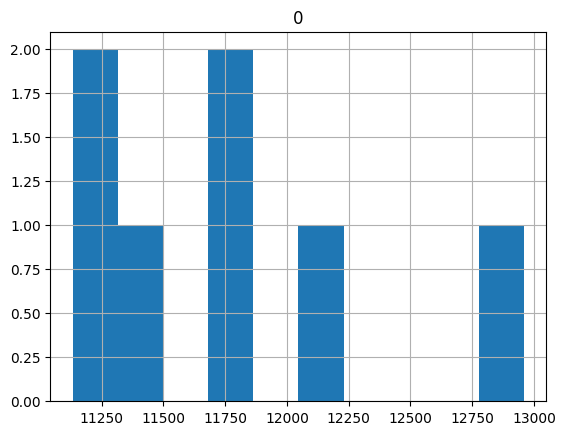

In [20]:
df.hist()

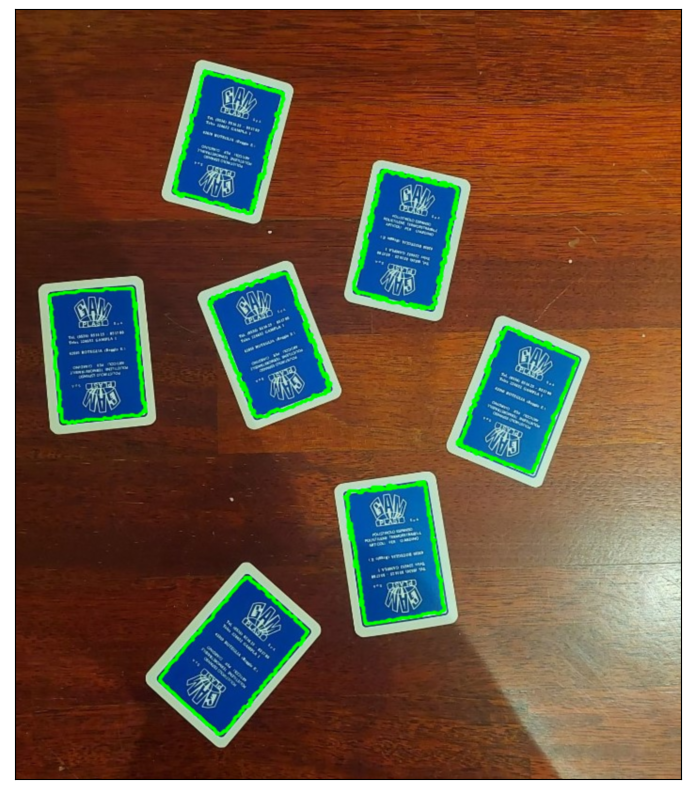

In [21]:
# only plot some contours

cntr = [c for c in contours if cv.contourArea(c) > 5000]

# draw contours on the original image
image_copy = imgr.copy()
cv.drawContours(image=image_copy, contours=cntr, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv.LINE_AA)

showimage(image_copy)

In [22]:
print('There are', len(cntr), ' cards')

There are 7  cards


In [30]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
    
img = r"C:\Users\carlo\Dropbox\big projects dropbox\wecloud\obj count\cards\25.jpg"

def count_card(img):
    imgr =img = cv.imread(img)
    img_hsv = cv.cvtColor(imgr, cv.COLOR_BGR2HSV)
    # range of interest - hue is the color
    lower_blue = np.array([100,40,0])
    upper_blue = np.array([200,255,255])
    # we detect the blue
    mask = cv.inRange(img_hsv, lower_blue, upper_blue)
    contours, hierarchy = cv.findContours(image=mask, mode=cv.RETR_TREE, method=cv.CHAIN_APPROX_NONE)
    # only plot some contours
    cntr = [c for c in contours if cv.contourArea(c) > 5000]
    # draw contours on the original image
    image_copy = imgr.copy()
    cv.drawContours(image=image_copy, contours=cntr, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv.LINE_AA)
    cv.imwrite('contours.png', image_copy) 
    return 'There are '+ len(cntr) +' cards'

In [31]:
count_card(img)

There are 7  cards


# yolov5 local inference

In [1]:
import torch

# from IPython.display import Image, clear_output  # to display images
# from utils.downloads import attempt_download  # to download models/datasets

# # clear_output()
# print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

ImportError: cannot import name 'Self' from 'typing_extensions' (c:\Users\carlo\Anaconda3\envs\rasa2\lib\site-packages\typing_extensions.py)